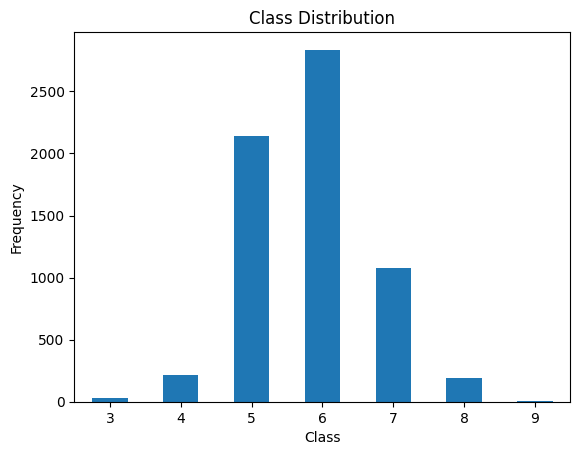

In [ ]:
# Initiate
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt

# Fetch dataset (red wine)
wine_quality = fetch_ucirepo(id=186)

# Create pandas dataframes of the data.
X = wine_quality.data.features
y = wine_quality.data.targets
data = pd.concat([X, y], axis = 1)

# STEP 1

# Display the first few rows of the dataset
# print(data.head())

# Plot class distribution
data['quality'].value_counts(sort = False).sort_index().plot(kind = 'bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation = 0)
plt.show()


In [13]:
# STEP 2

from sklearn.model_selection import train_test_split

# Binarize the target variable (e.g., classify wine as good or bad)
data['quality'] = (data['quality'] >= 6).astype(int)  # Assuming quality >= 6 is 'good' and < 6 is 'bad'

# Define the feature matrix X and the target vector y
X = data.drop('quality', axis=1)
y = data['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# STEP 3

from sklearn.preprocessing import StandardScaler

# Perform scaling on the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# STEP 4

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedKFold, cross_val_score

# Initialize the logistic regression model
model = LogisticRegression(solver='liblinear')

# Define the cross-validation strategy
rkf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=42)

# Choose metrics for evaluation
scoring_metrics = ['accuracy', 'precision', 'recall']

# Evaluate the model using cross-validation
results = {}
for metric in scoring_metrics:
    scores = cross_val_score(model, X_train_scaled, y_train, scoring=metric, cv=rkf)
    results[metric] = (scores.mean(), scores.std())

# Print the evaluation results
for metric in scoring_metrics:
    print(f"\n{metric.capitalize()} - Mean: {results[metric][0]:.4f}, Std Dev: {results[metric][1]:.4f}")

In [ ]:
# STEP 5

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train the model on the entire training set
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate and print test set metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)

print(f"\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")


Test Set Metrics:
Accuracy: 0.7238
Precision: 0.7823
Recall: 0.7998
